In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling

import warnings

warnings.filterwarnings('ignore')

In [11]:
bike_train = pd.read_csv('./input/train.csv')
bike_test = pd.read_csv('./input/test.csv')

In [12]:
bike_train.shape

(10886, 12)

In [13]:
datetime = bike_test['datetime']

## 数据探索

In [14]:
bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### 查看不重复的列值

In [15]:
bike_train.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

#### 查看数据的缺失值

In [16]:
# bike_train.isnull().sum()

#### 使用 `missingno` 无效矩阵的数据密集显示

可以看出在我们的数据中没有缺失值

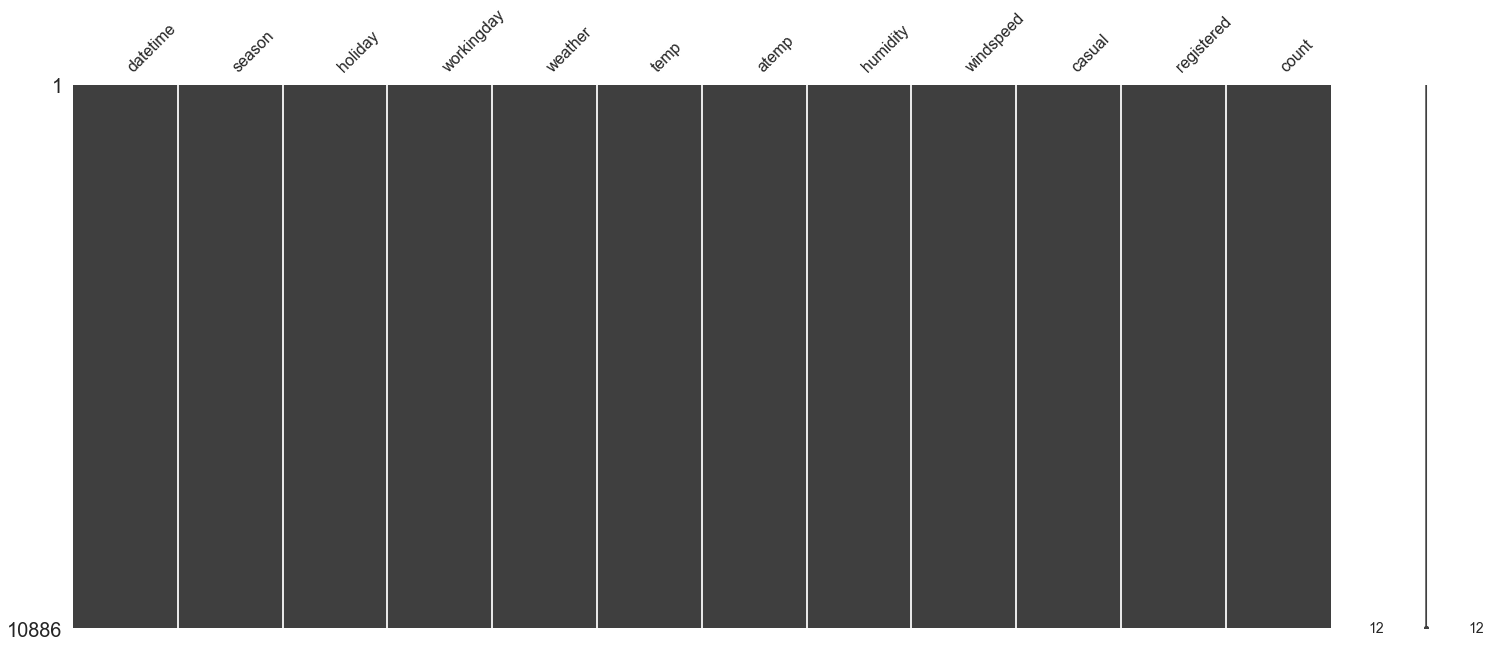

In [17]:
msno.matrix(bike_train)

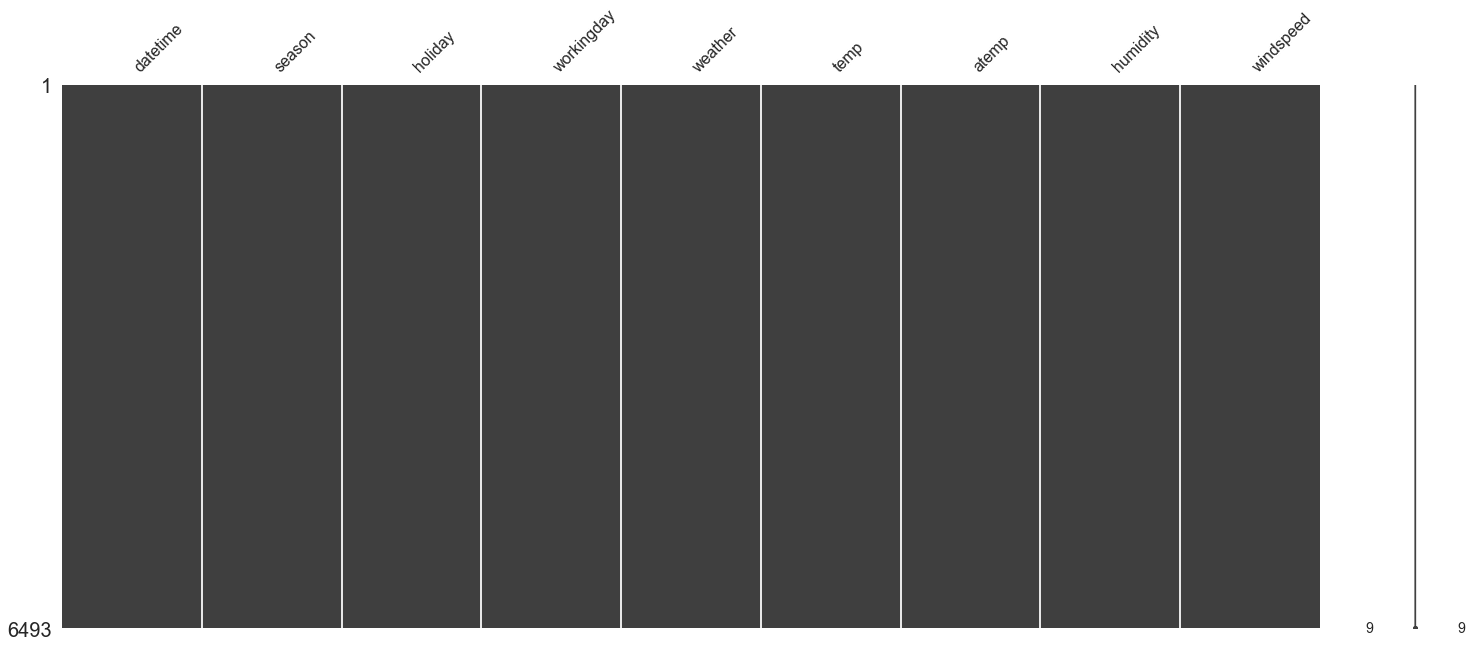

In [18]:
msno.matrix(bike_test)

#### 使用 `pandas_profiling` 来对数据进行分析

In [19]:
# profile = bike_train.profile_report(title = 'Pandas Profile Report')
# profile.to_file(output_file = 'Bike Sharing profile.html')

#### 对 `连续型数据` 进行 `箱型图` 可视化

In [20]:
sns.set(style='whitegrid',color_codes=True)
# from matplotlib import style
# style.use('fivethirtyeight')

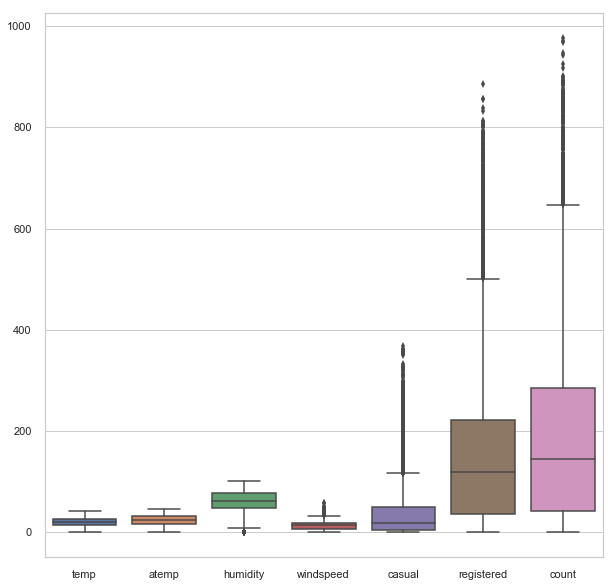

In [21]:
sns.boxplot(data=bike_train[['datetime', 'temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig = plt.gcf()            # 获取 fig 对象
fig.set_size_inches(10,10) # 设置图像的长度和宽度

## 特征工程

#### 将分类变量 `season` 转化为虚拟变量 - `训练数据`

In [22]:
# season = pd.get_dummies(bike_train['season'],prefix='season')
# bike_train = pd.concat([bike_train,season],axis=1)
# bike_train.drop(columns='season',inplace=True)
# bike_train.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


#### 将分类变量 `season` 转化为虚拟变量 - `验证数据`

In [23]:
# season = pd.get_dummies(bike_test['season'],prefix='season')
# bike_test = pd.concat([bike_test,season],axis=1)
# bike_test.drop(columns='season',inplace=True)
# bike_test.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


#### 将分类变量 `workingday` 转化为虚拟变量 - `训练数据`

In [24]:
# workingday = pd.get_dummies(bike_train['workingday'],prefix='workingday')
# bike_train = pd.concat([bike_train,workingday],axis=1)
# bike_train.drop(columns='workingday',inplace=True)
# bike_train.head()

#### 将分类变量 `workingday` 转化为虚拟变量 - `验证数据`

In [25]:
# workingday = pd.get_dummies(bike_test['workingday'],prefix='workingday')
# bike_test = pd.concat([bike_test,workingday],axis=1)
# bike_test.drop(columns='workingday',inplace=True)
# bike_test.head()

#### 将分类变量 `holiday` 转化为虚拟变量 - `训练数据`

In [26]:
# holiday = pd.get_dummies(bike_train['holiday'],prefix='holiday')
# bike_train = pd.concat([bike_train,holiday],axis=1)
# bike_train.drop(columns='holiday',inplace=True)
# bike_train.head()

#### 将分类变量 `holiday` 转化为虚拟变量 - `验证数据`

In [27]:
# holiday = pd.get_dummies(bike_test['holiday'],prefix='holiday')
# bike_test = pd.concat([bike_test,holiday],axis=1)
# bike_test.drop(columns='holiday',inplace=True)
# bike_test.head()

#### 将分类变量 `weather` 转化为虚拟变量 - `训练数据`

In [28]:
# weather = pd.get_dummies(bike_train['weather'],prefix='weather')
# bike_train = pd.concat([bike_train,weather],axis=1)
# bike_train.drop(columns='weather',inplace=True)
# bike_train.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


#### 将分类变量 `weather` 转化为虚拟变量 - `验证数据`

In [29]:
# weather = pd.get_dummies(bike_test['weather'],prefix='weather')
# bike_test = pd.concat([bike_test,weather],axis=1)
# bike_test.drop(columns='weather',inplace=True)
# bike_test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


#### 将 `训练集` 时间 `datetime` 进行转换
 `pd.DatetimeIndex`  (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html)

In [30]:
pd.DatetimeIndex(bike_train['datetime'])

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [31]:
bike_train['hour']  = [ t.hour for t in pd.DatetimeIndex(bike_train['datetime'])]
bike_train['day']  = [ t.dayofweek for t in pd.DatetimeIndex(bike_train['datetime'])]
bike_train['month']  = [ t.month for t in pd.DatetimeIndex(bike_train['datetime'])]
bike_train['year']  = [ t.year for t in pd.DatetimeIndex(bike_train['datetime'])]
bike_train['year'] = bike_train['year'].map({2011:0,2012:1})
bike_train.drop(columns='datetime',inplace=True)
bike_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,0,1,0,0,0,4,5,1,0


#### 将 `测试集` 时间 `datetime` 进行转换

In [32]:
bike_test['hour']  = [ t.hour for t in pd.DatetimeIndex(bike_test['datetime'])]
bike_test['day']  = [ t.dayofweek  for t in pd.DatetimeIndex(bike_test['datetime'])]
bike_test['month']  = [ t.month for t in pd.DatetimeIndex(bike_test['datetime'])]
bike_test['year']  = [ t.year for t in pd.DatetimeIndex(bike_test['datetime'])]
bike_test['year'] = bike_test['year'].map({2011:0,2012:1})
bike_test.drop(columns='datetime',inplace=True)
bike_test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


#### 在训练集中查看 `hour` 和 `count` 的关系

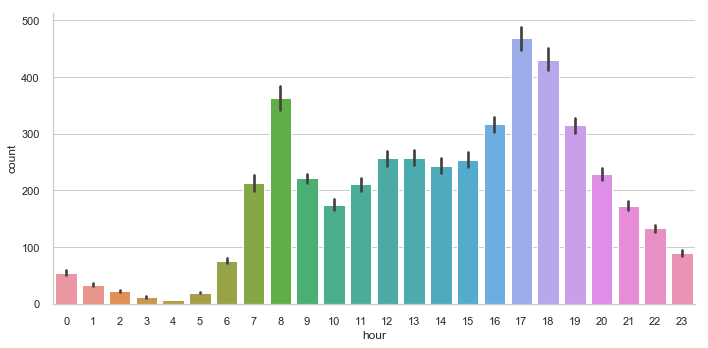

In [68]:
sns.factorplot(x='hour',y='count',data=bike_train,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

#### 将小时数`离散化`成 `凌晨 label1`、   `早上 label2`  、`下午 label3`  和 `傍晚 label4` 四种

In [69]:
# bike_train['hour'] = pd.cut(bike_train['hour'],4)
# bike_train.head()

In [70]:
# bike_train['hour'].unique()

In [71]:
# from sklearn.preprocessing import LabelEncoder

In [72]:
# le = LabelEncoder()
# bike_train['hour'] = le.fit_transform(bike_train['hour'])
# bike_test['hour'] = le.fit_transform(bike_test['hour'])

In [73]:
# bike_train.head()

In [74]:
# sns.factorplot(x='hour',y='count',data=bike_train,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

In [75]:
# sns.factorplot(x='day',y='count',data=bike_train,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

In [76]:
# bike_train[['day','hour','count']].groupby(['day','hour']).mean().plot.bar(figsize=(15,8))

#### 查看 `月份` `day` `year` 与 `count` 的关系

In [81]:
# bike_train[['month','day','hour']].groupby(['month','day']).mean().plot.bar(figsize=(25,8))

In [82]:
# sns.factorplot(x='month',y='count',data=bike_train,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

In [83]:
# sns.factorplot(x='year',y='count',data=bike_train,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

#### `casual` 和 `registered` 和 `count` 高度相关，并且测试集中不存在相应标签，这里进行删除 

In [84]:
# bike_train.drop(columns=['casual','registered'],inplace=True)

#### `temp` 和 `atemp` 高度相关，这里只保留一项

In [85]:
# bike_train.drop(columns=['temp'],inplace=True)
# bike_test.drop(columns=['temp'],inplace=True)

bike_train.drop(columns=['atemp'],inplace=True)
bike_test.drop(columns=['atemp'],inplace=True)

In [86]:
bike_train.head()

,holiday,workingday,temp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


#### 对 `连续数据`  `atemp`、`humidity`、`windspeed` 做 `离散化处理`

In [87]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()


# atemp
# bike_train['atemp'] = pd.cut(bike_train['atemp'],5)
# bike_test['atemp'] = pd.cut(bike_test['atemp'],5)

# bike_train[['atemp','count']].groupby(['atemp'],as_index=False).mean().sort_values(by='count',ascending=False)
# bike_train['atemp'] = le.fit_transform(bike_train['atemp'])
# bike_test['atemp'] = le.fit_transform(bike_test['atemp'])

# temp
# bike_train['temp'] = pd.cut(bike_train['temp'],5)
# bike_test['temp'] = pd.cut(bike_test['temp'],5)

# bike_train[['temp','count']].groupby(['temp'],as_index=False).mean().sort_values(by='count',ascending=False)
# bike_train['temp'] = le.fit_transform(bike_train['temp'])
# bike_test['temp'] = le.fit_transform(bike_test['temp'])


# # humidity
# bike_train['humidity'] = pd.cut(bike_train['humidity'],10)
# bike_test['humidity'] = pd.cut(bike_test['humidity'],10)

# bike_train[['humidity','count']].groupby(['humidity'],as_index=False).mean().sort_values(by='count',ascending=False)
# bike_train['humidity'] = le.fit_transform(bike_train['humidity'])
# bike_test['humidity'] = le.fit_transform(bike_test['humidity'])

# # windspeed
# bike_train['windspeed'] = pd.cut(bike_train['windspeed'],5)
# bike_test['windspeed'] = pd.cut(bike_test['windspeed'],5)

# bike_train[['windspeed','count']].groupby(['windspeed'],as_index=False).mean().sort_values(by='count',ascending=False)

# bike_train['windspeed'] = le.fit_transform(bike_train['windspeed'])
# bike_test['windspeed'] = le.fit_transform(bike_test['windspeed'])

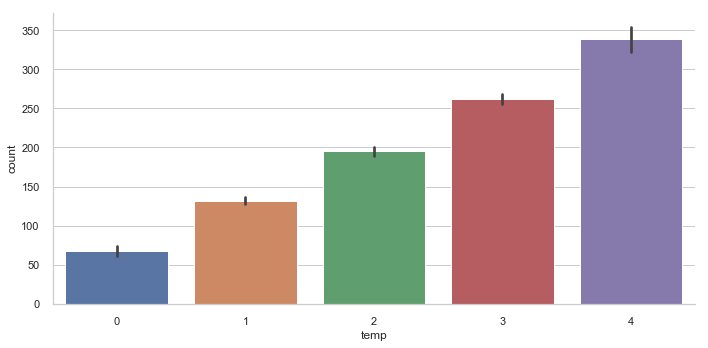

In [89]:
sns.factorplot(x='temp',y='count',data=bike_train,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

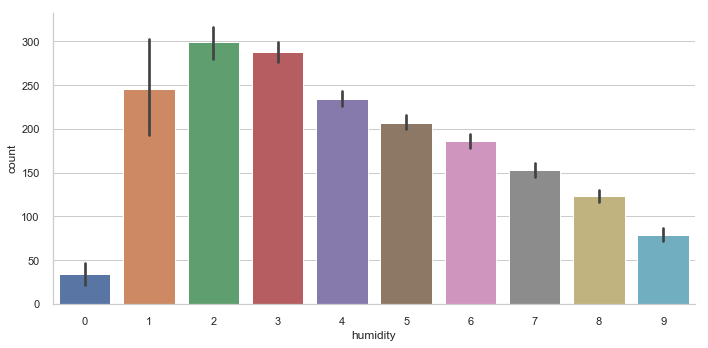

In [90]:
sns.factorplot(x='humidity',y='count',data=bike_train,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

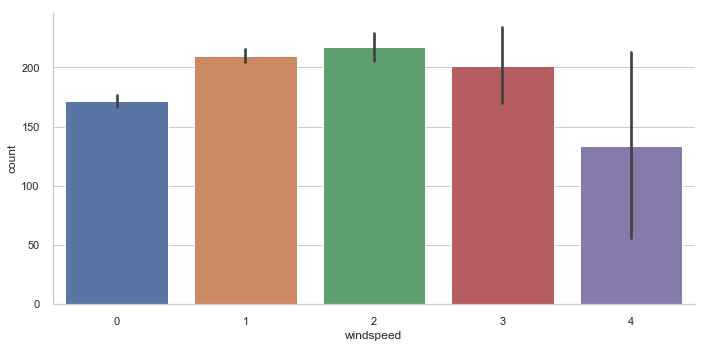

In [91]:
sns.factorplot(x='windspeed',y='count',data=bike_train,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

In [92]:
bike_train.head()

,holiday,workingday,temp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,1,8,0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,1,7,0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,1,7,0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,1,7,0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,1,7,0,1,1,0,0,0,1,0,0,0,4,5,1,0


#### 将 `count` 从训练数据中提出

In [93]:
bike_train_y = bike_train[['count']]
bike_train_x = bike_train.drop(columns='count')

In [94]:
bike_train_x.head()

,holiday,workingday,temp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,1,8,0,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,1,7,0,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,1,7,0,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,1,7,0,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,1,7,0,1,0,0,0,1,0,0,0,4,5,1,0


In [95]:
bike_test.head()

,holiday,workingday,temp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,1,1,4,2,1,0,0,0,1,0,0,0,0,3,1,0
1,0,1,1,4,0,1,0,0,0,1,0,0,0,1,3,1,0
2,0,1,1,4,0,1,0,0,0,1,0,0,0,2,3,1,0
3,0,1,1,4,0,1,0,0,0,1,0,0,0,3,3,1,0
4,0,1,1,4,0,1,0,0,0,1,0,0,0,4,3,1,0


In [96]:
bike_test.columns.unique() ==  bike_train_x.columns.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

#### 重新进行数据分析 `pandas_profiling`

In [97]:
profile = bike_train.profile_report(title='pandas profile report2')
profile.to_file(output_file='bike sharing profiling2.html')

## 建立模型

In [98]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

In [99]:
# from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [100]:
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [101]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error

In [102]:
kfolder = KFold(n_splits=10,random_state=1)

In [103]:
x_train,x_test,y_train,y_test = train_test_split(bike_train_x,bike_train_y,test_size=0.1,random_state=10)

In [104]:
# for train,test in sfolder.split(bike_train_x,bike_train_y):
#     print(train.shape,test.shape)

In [105]:
# bike_train_x.loc[train].head()

In [106]:
# bike_train_y.loc[train].head()

In [107]:
MLA = [
    
    # Ensemble Methods
    RandomForestRegressor(),
    AdaBoostRegressor(),
    BaggingRegressor(),
#     GradientBoostingRegressor(),
    
    
    # line_model
#     Lasso(),
#     Ridge(),
#     LinearRegression(),
#     LogisticRegression(), 
    
    # svm
#     SVR(),
#     LinearSVR(),
    
    # knn
    KNeighborsRegressor(),
    
    # Tree
    DecisionTreeRegressor(),
    

    
    # XGB
#     XGBRegressor(),
    
]

### 对于 `回归` 使用 `RMSLE` 进行 `模型评估`

由于 `MSLE` 不能对 `负数` 进行处理 ( `ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.`)

在进行 `MSLE = mean_squared_log_error(y_pred,bike_train_y)` 就会出错，大部分线性模型好像都会出现这样的情况

类似于 `Lasso` 回归，对数值 `敏感` ，可采用 `标准化` 数据，但是使用 `线性回归` 的预测效果很 `差`。

In [108]:
# from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [109]:
# ss = StandardScaler()
# mms = MinMaxScaler()

In [110]:
# bike_train_x['new_atemp'] = ss.fit_transform(bike_train_x[['atemp']])
# bike_train_x['new_humidity'] = ss.fit_transform(bike_train_x[['humidity']])
# bike_train_x['new_windspeed'] = ss.fit_transform(bike_train_x[['windspeed']])

# mms.fit_transform(bike_train_x[['atemp']])
# bike_train_x['atemp'] = mms.fit_transform(bike_train_x[['atemp']])

In [111]:
# bike_train_x.drop(columns=['atemp','humidity','windspeed'],inplace=True)
# bike_train_x.head()

#### `测试集` 做相同的处理

In [112]:
# bike_test['atemp'] = ss.fit_transform(bike_test[['atemp']])
# bike_test['humidity'] = ss.fit_transform(bike_test[['humidity']])
# bike_test['windspeed'] = ss.fit_transform(bike_test[['windspeed']])

# mms.fit_transform(bike_test[['atemp']])
# bike_test['atemp'] = mms.fit_transform(bike_test[['atemp']])

### 绘制 `线性回归` 的 `学习曲线`

#### 使用 `多项式回归` 仍然会造成 `y_pred` 中存在 `负数` 的现象，无法进行 `mean_squared_log_error`

#### 结论：没法用 `线性回归` 损失太大, `多项式回归` 损失也很大

#### 绘制 `学习曲线` 的函数

In [113]:
# from sklearn.model_selection import train_test_split

In [114]:
# def plot_learning_curves(model,x,y):
#     x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)
#     train_errors,val_errors = [],[]
#     for m in range(1,len(x_train)):
#         model.fit(x_train[:m],y_train[:m])
#         y_train_predict = model.predict(x_train[:m])
#         y_val_predict = model.predict(x_val)
#         train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
#         val_errors.append(mean_squared_error(y_val_predict,y_val))
#     plt.plot(np.sqrt(train_errors),'r-',linewidth=2,label = 'train')
#     plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label = 'val')    
#     plt.ylabel('RMSE')
#     plt.xlabel('Training set size')    
#     plt.legend(loc='upper right')

<div align=left><img width="400" height="300" src="static/1.jpg"/></div>

In [115]:
# model = Lasso()
# plot_learning_curves(model,bike_train_x,bike_train_y)

#### `191` 列数据 `预测值` 和 `真实值` 之间的差别

In [116]:
# display(bike_train_y.loc[191])
# model.predict([bike_train_x.loc[191]])

# -- output 
# count    1                     # 真实值
# Name: 191, dtype: int64
# array([-28.11482529])          # 预测值

#### 采用 `多项式回归` 绘制 `RMSE` 学习曲线 数量很多，绘制很慢

In [117]:
# from sklearn.preprocessing import PolynomialFeatures
# ploy_features = PolynomialFeatures(degree=2,include_bias=False)
# x_poly = ploy_features.fit_transform(bike_train_x)
# x_poly  = pd.DataFrame(x_poly)

In [118]:
# model = Lasso()
# plot_learning_curves(model,x_poly,bike_train_y)

In [119]:
# display(bike_train_y.loc[191])
# model.predict([x_poly.loc[191]])

### 构造 `RMSLE`

#### 普通的 RMSLE

In [120]:
MLA_List1 = ['MLA_Name','MLA_Parameters','MLA_RMSLE']
MLA_Compare1 = pd.DataFrame(columns=MLA_List1)
MLA_predict1 = bike_train[['count']].copy(deep=True)

def RMSLE(models,bike_train_x,bike_train_y,x_test,y_test):
    
    for row_index,model in enumerate(models):
        
        model.fit(bike_train_x,bike_train_y)
        y_pred = model.predict(x_test)

        MSLE = mean_squared_log_error(y_pred,y_test)
        RMSLE = np.sqrt(MSLE)
        
        print('model name: {} RMSLE_mean: {}'.format(model.__class__.__name__,RMSLE))
        MLA_Name = model.__class__.__name__
        MLA_Compare1.loc[row_index,'MLA_Name'] = MLA_Name
        MLA_Compare1.loc[row_index,'MLA_Parameters'] = str(model.get_params())
        MLA_Compare1.loc[row_index,'MLA_RMSLE'] = RMSLE
        
        test_index = x_test.index
        MLA_predict1.loc[test_index,MLA_Name] = y_pred                                             # 以最后一次预测为准
        
    return MLA_Compare1,MLA_predict1

#### `额外创建一个新的数据` 只处理 `时间` 特征，直接训练 `原始数据`

#### 对于 `随机森林`，`离散化` 不是特别重要

In [121]:
# train = pd.read_csv('./input/train.csv')
# train.drop(columns=['casual','registered'])

# test = pd.read_csv('./input/test.csv')

In [122]:
# train['hour']  = [ t.hour for t in pd.DatetimeIndex(train['datetime'])]
# train['day']  = [ t.dayofweek for t in pd.DatetimeIndex(train['datetime'])]
# train['month']  = [ t.month for t in pd.DatetimeIndex(train['datetime'])]
# train['year']  = [ t.year for t in pd.DatetimeIndex(train['datetime'])]
# train['year'] = train['year'].map({2011:0,2012:1})
# train.drop(columns='datetime',inplace=True)

# test['hour']  = [ t.hour for t in pd.DatetimeIndex(test['datetime'])]
# test['day']  = [ t.dayofweek for t in pd.DatetimeIndex(test['datetime'])]
# test['month']  = [ t.month for t in pd.DatetimeIndex(test['datetime'])]
# test['year']  = [ t.year for t in pd.DatetimeIndex(test['datetime'])]
# test['year'] = test['year'].map({2011:0,2012:1})
# test.drop(columns='datetime',inplace=True)

In [123]:
# train_y = train[['count']]
# train_x = train.drop(columns=['count','casual','registered'])

# x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size=0.1,random_state=10)

In [124]:
# MLA_Compare1,MLA_predict1 = RMSLE(MLA,x_train,y_train,x_test,y_test)

    model name: RandomForestRegressor RMSLE_mean: 0.32866455840201836
    model name: AdaBoostRegressor RMSLE_mean: 0.9740112414207933
    model name: BaggingRegressor RMSLE_mean: 0.3409647770588515
    model name: KNeighborsRegressor RMSLE_mean: 0.8700805681077372
    model name: DecisionTreeRegressor RMSLE_mean: 0.4232183710073101

In [125]:
# train_x.head()

In [126]:
# test.head()

In [127]:
# rdr2 = RandomForestRegressor()
# rdr2.set_params(**{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False})

# rdr2.fit(train_x,train_y)

# predictions= rdr2.predict(test)
# submit_data=pd.DataFrame({'datetime':datetime,'count':predictions})
# submit_data[submit_data['count']==0].count()

# submit_data.to_csv("only_deal_data_grid_search.csv", index=False)

#### `处理各种特征` 使用 `MLA` 中的模型进行 `回归分析` 使用的 `rmsle`

In [128]:
x_train.head()

,holiday,workingday,temp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
1108,0,1,2,0,3,1,0,0,0,0,0,1,0,19,3,3,0
7932,0,0,3,6,0,0,1,0,0,1,0,0,0,21,6,6,1
3675,0,0,3,8,0,0,0,1,0,1,0,0,0,1,6,9,0
9347,0,1,3,5,0,0,0,1,0,1,0,0,0,20,2,9,1
8246,1,0,3,4,0,0,0,1,0,0,1,0,0,23,2,7,1


In [129]:
MLA_Compare1,MLA_predict1 = RMSLE(MLA,x_train,y_train,x_test,y_test)

model name: RandomForestRegressor RMSLE_mean: 0.33208025002665725
model name: AdaBoostRegressor RMSLE_mean: 1.1724057503689818
model name: BaggingRegressor RMSLE_mean: 0.3390728250360728
model name: KNeighborsRegressor RMSLE_mean: 0.4158277947141959
model name: DecisionTreeRegressor RMSLE_mean: 0.4278397648578562


#### 统计 `模型` 的 `名称`、`参数`、`RMSLE` 

In [130]:
MLA_Compare1 = MLA_Compare1.sort_values('MLA_RMSLE',ascending=True)
MLA_Compare1

,MLA_Name,MLA_Parameters,MLA_RMSLE
0,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.33208
2,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",0.339073
3,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.415828
4,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.42784
1,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",1.17241


In [131]:
MLA_predict1[MLA_predict1['RandomForestRegressor'].isnull() == False].head(5)

,count,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,KNeighborsRegressor,DecisionTreeRegressor
22,28,31.1,119.481360,36.000000,54.4,9.0
32,20,25.8,139.466830,30.100000,35.8,47.0
43,22,38.4,164.064646,35.200000,45.2,38.0
53,154,189.4,164.064646,183.271429,95.2,195.0
79,57,56.7,154.434149,59.200000,68.0,78.0


#### 普通 `RMSLE` 的模型可视化

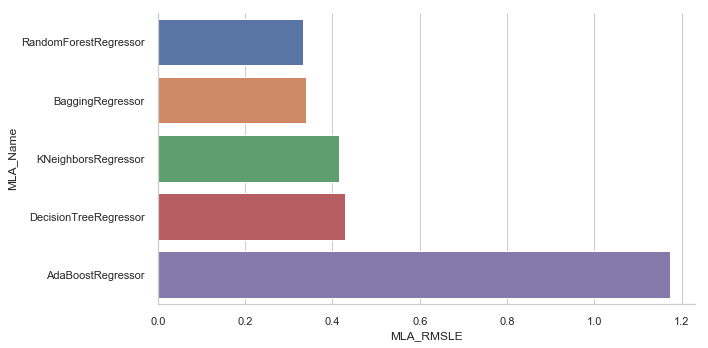

In [132]:
sns.factorplot(x='MLA_RMSLE',y='MLA_Name',data=MLA_Compare1,kind='bar',size=5,aspect=2)  # aspect 每个图片的纵横比

#### 交叉验证 RMSLE

In [133]:
MLA_List = ['MLA_Name','MLA_Parameters','MLA_RMSLE']
MLA_Compare = pd.DataFrame(columns=MLA_List)

MLA_predict = bike_train[['count']].copy(deep=True)

def RMSLE_cv(models):
    
    for row_index,model in enumerate(models):
        rmsle_lists = []
        
        for train_index,test_index in kfolder.split(bike_train_x,bike_train_y):    # 划分数据

            train_x = bike_train_x.loc[train_index]                                # 训练数据
            train_y = bike_train_y.loc[train_index]                                # 训练数据标签

            test_x = bike_train_x.loc[test_index]                                  # 验证数据
            test_y = bike_train_y.loc[test_index]                                  # 验证数据标签
            
#             return train_index,test_index
        
    #         print('train_x.shape,train_y.shape: ',train_x.shape,train_y.shape)       
    #         print('test_x.shape,test_y.shape: ',test_x.shape,test_y.shape)
    #         print('\n')

            model.fit(train_x,train_y)                                             # 模型训练
            y_pred = model.predict(test_x)                                         # 预测
            
#             print(y_pred.shape)
            
            MSLE = mean_squared_log_error(test_y,y_pred)                           # MSLE

            RMSLE = np.sqrt(MSLE)                                                  # RMSLE  

            rmsle_lists.append(RMSLE) 
        
        RMSLE = np.mean(rmsle_lists)
        print('model name: {} RMSLE_mean: {}'.format(model.__class__.__name__,RMSLE))
        MLA_Name = model.__class__.__name__
        MLA_Compare.loc[row_index,'MLA_Name'] = MLA_Name
        MLA_Compare.loc[row_index,'MLA_Parameters'] = str(model.get_params())
        MLA_Compare.loc[row_index,'MLA_RMSLE'] = RMSLE
        
        MLA_predict.loc[test_index,MLA_Name] = y_pred                                             # 以最后一次预测为准
        
    return MLA_Compare,MLA_predict

#### 使用 `MLA` 中的模型进行 `回归分析` 使用 `交叉验证` 的 `rmsle`

看起来交叉验证的效果好像更差......

In [134]:
# MLA_Compare = RMSLE_cv(MLA)
MLA_Compare,MLA_predict= RMSLE_cv(MLA)

model name: RandomForestRegressor RMSLE_mean: 0.42751273142192164
model name: AdaBoostRegressor RMSLE_mean: 1.0487120794287519
model name: BaggingRegressor RMSLE_mean: 0.43196827817750566
model name: KNeighborsRegressor RMSLE_mean: 0.5744026512093985
model name: DecisionTreeRegressor RMSLE_mean: 0.516560669542323


#### 统计 `模型` 的 `名称`、`参数`、`RMSLE` 

In [135]:
MLA_Compare = MLA_Compare.sort_values('MLA_RMSLE',ascending=True)
MLA_Compare

,MLA_Name,MLA_Parameters,MLA_RMSLE
0,RandomForestRegressor,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",0.427513
2,BaggingRegressor,"{'base_estimator': None, 'bootstrap': True, 'b...",0.431968
4,DecisionTreeRegressor,"{'criterion': 'mse', 'max_depth': None, 'max_f...",0.516561
3,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.574403
1,AdaBoostRegressor,"{'base_estimator': None, 'learning_rate': 1.0,...",1.04871


In [136]:
MLA_predict[MLA_predict['RandomForestRegressor'].isnull() == False].head(5)

,count,RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,KNeighborsRegressor,DecisionTreeRegressor
9798,455,394.000,441.368948,424.85,370.8,371.0
9799,520,549.875,448.059062,551.80,485.4,634.0
9800,837,812.300,661.949816,799.00,537.6,827.0
9801,642,808.700,661.949816,783.40,448.8,692.0
9802,493,503.400,560.720822,467.90,300.4,568.0


#### 模型 `RMSLE` 可视化

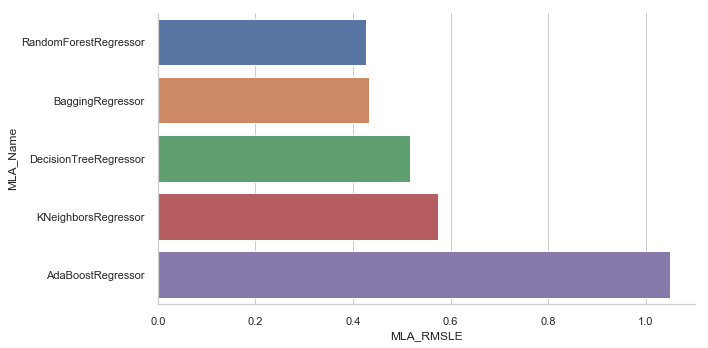

In [137]:
sns.factorplot(x='MLA_RMSLE',y='MLA_Name',data=MLA_Compare,kind='bar',size=5,aspect=2)

### `rfe`  特征筛选 `第一步：寻找一个优化模型`

In [138]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [139]:
# rdr = RandomForestRegressor(random_state=10) 

# rmse = np.sqrt(-cross_val_score(rdr,x_train,y_train,scoring='neg_mean_squared_error',cv=kfolder))
# rdr.fit(x_train,y_train)

# print('BEFORE rdr Parameters：',rdr.get_params())
# print('BEFORE rdr neg_mean_squared_error score：',rmse.mean())

# # 值得注意的是，如果参数写的不细致，那么在网格搜索后输出模型的参数时，不指定的参数不存在，这会影响到模型的质量
    
# '''  指定如下参数，模型的 rmse 为 58
# rdr_param = [{
#         'n_estimators':[10,20,50,100],
#         'max_depth':[None,3,6,9],
#         'random_state':[0],
#         'max_features':['auto','sqrt'],
#     }]
# '''

# ''' 指定如下参数，模型的 rmse 为 45 '''

# rdr_param = [{
#         'n_estimators':[300],
#         'max_depth':[None,3,6,9],
#         'random_state':[0],
#         'max_features':['auto'],
#         'bootstrap':[True],
#         'max_leaf_nodes': [None,3,6], 
#         'min_impurity_decrease': [0.0], 
#         'min_impurity_split': [None],
#         'min_samples_leaf': [1], 
#         'min_samples_split': [2], 
#         'min_weight_fraction_leaf': [0.0], 
#         'n_jobs': [None], 
#         'oob_score': [False], 
#         'verbose': [0], 
#         'warm_start': [False]
#     }]


# best_rd_model = GridSearchCV(estimator=rdr,param_grid=rdr_param,cv=kfolder,scoring='neg_mean_squared_error')
# best_rd_model.fit(x_train,y_train)
# best_rd_params = best_rd_model.best_params_

# print('\n')
# print('AFTER rdr Parameters: ',best_rd_model.best_params_)
# print('AFTER rdr RMSE: ',np.sqrt(-best_rd_model.cv_results_['mean_test_score'][best_rd_model.best_index_]))

In [140]:
# '''
# BEFORE rdr Parameters： {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}
# BEFORE rdr neg_mean_squared_error score： 45.53211082344724


# AFTER rdr Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
# AFTER rdr RMSE:  45.26016783750548
# '''

### `rfe`  特征筛选 `第二步：进行特征选择`

In [141]:
# print('BEFORE rdr data Shape: ',x_train.shape)
# print('BEFORE  rdr REF Columns: ',x_train.columns)
# print('\n')

# # 筛选特征
# rdr_rfe = RFECV(rdr,step=1,scoring='neg_mean_squared_error',cv=kfolder)
# rdr_rfe.fit(x_train,y_train)
# x_rfe = x_train.columns.values[rdr_rfe.get_support()]

# # 进行特征选择 后 重新训练
# rfe_score = np.sqrt(-cross_val_score(rdr,x_train[x_rfe],y_train,cv=kfolder,scoring='neg_mean_squared_error'))
# print('ALTER RFE rdr RMSE Score：',rfe_score.mean())
# print('AFTER  rdr REF Shape: ',x_train[x_rfe].shape)
# print('AFTER  rdr REF Columns: ',x_rfe)
# print('\n')

# # 进行 特征选择 对优化后的模型进行训练
# best_rd_model.fit(x_train[x_rfe],y_train)
# rdr_rfe.fit(x_train[x_rfe],y_train)
# rfe_score = np.sqrt(-cross_val_score(rdr,x_train[x_rfe],y_train,cv=kfolder,scoring='neg_mean_squared_error'))

# print('AFTER  best_rdr REF  Shape: ',x_train[x_rfe].shape)
# print('AFTER  best_rdr REF  Columns: ',x_rfe)
# print('ALTER RFE best_rdr RMSE Score：',rfe_score.mean())

In [142]:
''' 特征选择没起到效果
BEFORE rdr data Shape:  (9797, 19)
BEFORE  rdr REF Columns:  Index(['atemp', 'humidity', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'workingday_0', 'workingday_1', 'holiday_0', 'holiday_1',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour', 'day',
       'month', 'year'],
      dtype='object')


ALTER RFE rdr RMSE Score： 45.4830047072299
AFTER  rdr REF Shape:  (9797, 13)
AFTER  rdr REF Columns:  ['atemp' 'humidity' 'windspeed' 'season_1' 'workingday_0' 'workingday_1'
 'holiday_0' 'weather_1' 'weather_3' 'hour' 'day' 'month' 'year']


AFTER  best_rdr REF  Shape:  (9797, 13)
AFTER  best_rdr REF  Columns:  ['atemp' 'humidity' 'windspeed' 'season_1' 'workingday_0' 'workingday_1'
 'holiday_0' 'weather_1' 'weather_3' 'hour' 'day' 'month' 'year']
ALTER RFE best_rdr RMSE Score： 45.4830047072299
'''

" 特征选择没起到效果\nBEFORE rdr data Shape:  (9797, 19)\nBEFORE  rdr REF Columns:  Index(['atemp', 'humidity', 'windspeed', 'season_1', 'season_2', 'season_3',\n       'season_4', 'workingday_0', 'workingday_1', 'holiday_0', 'holiday_1',\n       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'hour', 'day',\n       'month', 'year'],\n      dtype='object')\n\n\nALTER RFE rdr RMSE Score： 45.4830047072299\nAFTER  rdr REF Shape:  (9797, 13)\nAFTER  rdr REF Columns:  ['atemp' 'humidity' 'windspeed' 'season_1' 'workingday_0' 'workingday_1'\n 'holiday_0' 'weather_1' 'weather_3' 'hour' 'day' 'month' 'year']\n\n\nAFTER  best_rdr REF  Shape:  (9797, 13)\nAFTER  best_rdr REF  Columns:  ['atemp' 'humidity' 'windspeed' 'season_1' 'workingday_0' 'workingday_1'\n 'holiday_0' 'weather_1' 'weather_3' 'hour' 'day' 'month' 'year']\nALTER RFE best_rdr RMSE Score： 45.4830047072299\n"

### 寻找 `模型` 的 `最优参数`

In [143]:
import time

In [144]:
MLA2 = [
    
    # Ensemble Methods
    ('br',BaggingRegressor()),
    ('rfr',RandomForestRegressor()),
    ('Ada',AdaBoostRegressor()),
    
    # Tree
    ('dt',DecisionTreeRegressor()),
    
   # svm
#     ('svr',SVR()),
    # knn
    ('knn',KNeighborsRegressor()),
]

random_seed = [10]   # 随机种子 需要注意的是随机种子是一个列表

In [145]:
KNeighborsRegressor().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [146]:
grid_params = [
    [{
        # BaggingRegressor
        'n_estimators' : [100,200,300],
        'random_state' : random_seed,
        'max_features' : [0.75,1],
        'max_samples' : [0.75,1],
        'bootstrap': [True],
        'bootstrap_features': [False],
        'n_jobs': [None],
        'oob_score': [False],
        'verbose': [0],
        'warm_start': [False]

    }],
    
    [{
        # RandomForestRegressor

        'n_estimators':[500,600],
        'max_depth':[None],
        'random_state':random_seed,
        'max_features':['auto'],
        'bootstrap':[True],
        'max_leaf_nodes': [None], 
        'min_impurity_decrease': [0.0], 
        'min_impurity_split': [None],
        'min_samples_leaf': [1], 
        'min_samples_split': [2], 
        'min_weight_fraction_leaf': [0.0], 
        'n_jobs': [None], 
        'oob_score': [False], 
        'verbose': [0], 
        'warm_start': [False]

    }],
    
    [{
        # AdaboostRegressor
        'n_estimators': [100,300],
        'learning_rate': [0.25],
        # algorithm ： {'SAMME'，'SAMME.R'}，可选（默认='SAMME.R'） 选择使用什么算法
        'random_state':random_seed
    }],
    
    [{
        # DecisionTreeRegressor
        'max_depth': [6,10],
        'random_state': random_seed,
        'min_samples_leaf':[2],
    }],
    

        
#     [{
#         # SVR
#         'C': [1,2], #default=1.0 惩罚参数
#         'gamma': [0.005,0.001], # default: auto 
#         'shrinking':[True],
#     }]
    
        [{
        # knn
        'algorithm': ['auto'],
         'leaf_size': [30,40,50],
         'metric': ['minkowski'],
         'metric_params': [None],
         'n_jobs': [None],
         'n_neighbors': [5,6],
         'p': [2],
         'weights': ['uniform']
    }]
    
    
]

In [147]:
MLA_List = ['MLA_Name','MLA_Parameters','MLA_RMSLE']
MLA_Compare2 = pd.DataFrame(columns=MLA_List)
MLA_predict2 = bike_train[['count']].copy(deep=True)

start_time = time.perf_counter()

for row_index,(clf,param) in enumerate(zip(MLA2,grid_params)):
    one_model_start_time = time.perf_counter()
    
    best_model = GridSearchCV(estimator=clf[1],param_grid=param,scoring='neg_mean_squared_error')
#     best_model = GridSearchCV(estimator=clf[1],param_grid=param,scoring='neg_mean_squared_error',cv=kfolder)

    best_model.fit(x_train,y_train)
    
    end_time = time.perf_counter() - one_model_start_time
    
    best_params = str(best_model.best_params_)
    print('The beast parameter for {} is {} with runtime of {:.2f} secounds'.format(clf[1].__class__.__name__,best_params,end_time))

    y_pred = best_model.predict(x_test)                                         # 预测
    
    MSLE = mean_squared_log_error(y_test,y_pred)                           # MSLE
    RMSLE = np.sqrt(MSLE)                  
    print('The beast parameter for {} RMLSE is {}'.format(clf[1].__class__.__name__,RMSLE))
    print('\n')
    MLA_Name = clf[1].__class__.__name__
    MLA_Compare2.loc[row_index,'MLA_Name'] = MLA_Name
    MLA_Compare2.loc[row_index,'MLA_Parameters'] = best_params
    MLA_Compare2.loc[row_index,'MLA_RMSLE'] = RMSLE
    
    test_index = x_test.index
    MLA_predict2.loc[test_index,MLA_Name] = y_pred                                             # 以最后一次预测为准

The beast parameter for BaggingRegressor is {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False} with runtime of 38.80 secounds
The beast parameter for BaggingRegressor RMLSE is 0.7843361844281237


The beast parameter for RandomForestRegressor is {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False} with runtime of 87.87 secounds
The beast parameter for RandomForestRegressor RMLSE is 0.32652160565075816


The beast parameter for AdaBoostRegressor is {'learning_rate': 0.25, 'n_estimators': 100, 'random_state': 10} with runtime of 9.43 secounds
The beast parame

    The beast parameter for BaggingRegressor is {'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False} with runtime of 37.44 secounds
    The beast parameter for BaggingRegressor RMLSE is 0.7805306897744272


    The beast parameter for RandomForestRegressor is {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False} with runtime of 87.60 secounds
    The beast parameter for RandomForestRegressor RMLSE is 0.3255384792301417


    The beast parameter for AdaBoostRegressor is {'learning_rate': 0.25, 'n_estimators': 300, 'random_state': 10} with runtime of 10.91 secounds
    The beast parameter for AdaBoostRegressor RMLSE is 1.0446923874122735


    The beast parameter for DecisionTreeRegressor is {'max_depth': 10, 'min_samples_leaf': 2, 'random_state': 10} with runtime of 0.14 secounds
    The beast parameter for DecisionTreeRegressor RMLSE is 0.41603052146547737


    The beast parameter for KNeighborsRegressor is {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'} with runtime of 1.77 secounds
    The beast parameter for KNeighborsRegressor RMLSE is 0.42344334903756353

In [ ]:
MLA_Compare2 = MLA_Compare2.sort_values('MLA_RMSLE',ascending=True)
MLA_Compare2

In [ ]:
MLA_predict2[MLA_predict2['RandomForestRegressor'].isnull() == False].head(5)

In [ ]:
profile = bike_train.profile_report(title = 'Pandas Profile Report3')
profile.to_file(output_file = 'Bike Sharing profile3.html')

## 开始预测

#### 不调参前 预测

In [ ]:
rdr = RandomForestRegressor()
rdr.fit(bike_train_x,bike_train_y)

predictions= rdr.predict(bike_test)
submit_data=pd.DataFrame({'datetime':datetime,'count':predictions})
submit_data[submit_data['count']==0].count()

In [ ]:
submit_data.to_csv("no_grid_search.csv", index=False)

#### 调参后预测

In [ ]:
rdr2 = RandomForestRegressor()
rdr2.set_params(**{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False})

In [ ]:
bike_test.head()

In [ ]:
rdr2.fit(bike_train_x,bike_train_y)

predictions= rdr2.predict(bike_test)
submit_data=pd.DataFrame({'datetime':datetime,'count':predictions})
submit_data[submit_data['count']==0].count()

In [ ]:
submit_data.to_csv("grid_search.csv", index=False)

### 对于 `分类` 情况，直接进行 `分类预测`

In [ ]:
# MLA_List = ['MLA_Name','MLA_Parameters','MLA Train Accuracy Mean','MLA Test Accuracy Mean','MLA Test Accuracy 3*STD','MLA Time']
# MLA_Compare = pd.DataFrame(columns=MLA_list)

# MLA_predict = bike_train[['count']].copy(deep=True)

# for row_index,alg in enumerate(MLA):
#     MLA_Name = alg.__class__.__name__
#     MLA_Compare.loc[row_index,'MLA_Name'] = MLA_Name
#     MLA_Compare.loc[row_index,'MLA_Parameters'] = str(alg.get_params())
#     cv_result = cross_validate(alg,bike_train_x,bike_train_y,cv=sfolder,return_train_score=True,scoring='')
    
#     MLA_Compare.loc[row_index,'MLA Train Accuracy Mean'] = cv_result['train_score'].mean()
#     MLA_Compare.loc[row_index,'MLA Test Accuracy Mean'] = cv_result['test_score'].mean()
#     MLA_Compare.loc[row_index,'MLA Test Accuracy 3*STD'] = cv_result['test_score'].std()*3
#     MLA_Compare.loc[row_index,'MLA Time'] = cv_result['fit_time'].mean()
    
#     alg.fit(bike_train_x,bike_train_y)
    
#     MLA_predict[MLA_Name] = alg.predict(bike_train_x) 
    
# MLA_Compare.sort_values('MLA Test Accuracy Mean',ascending=True)    
# MLA_Compare